# Chapter 7: Advanced TensorBoard

## Lab 7: 

### - tf.summary
### - Experiment 1: Using tf.summary.image API to Visualize Training Results
### - Experiment 2: Hyperparameter Tuning with TensorBoard HParams

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-DL/blob/master/Lab7.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

##  tf.summary

tf.summary module contains APIs for writing summary data into log files which can be used to read and visualize in TensorBoard.

•	tf.summary.scalar: write a scalar summary such as loss value, accuracy value, or learning rate.

•	tf.summary.image: write an image summary. 

•	tf.summary.text: write a text summary.

•	tf.summary.audio: write an audio summary.

•	tf.summary.histogram: write a histogram summary.

In [30]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### a) tf.summary.scalar
tf.summary.scalar is an API of tf.summary module, which is used to write a scalar summary such as loss values, accuracy values, and so on.

In [31]:
#creating a TensorBoard log file
summary_writer = tf.summary.create_file_writer('lab7-logs-summary-scale')

In [32]:
# Generate 100 points linearly between 0 and 2π
x = np.linspace(0, 2 * np.pi , 100)
# using Sin function to generate data
data = np.sin(x)
with summary_writer.as_default():  # summary_writer
    for i, y in enumerate(data):
        tf.summary.scalar('sin', y, step=i) 

In [33]:
# open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
#open log file on TensorBoard
%tensorboard --port 9550 --logdir lab7-logs-summary-scale

Reusing TensorBoard on port 9550 (pid 3808), started 0:01:13 ago. (Use '!kill 3808' to kill it.)

### b) tf.summary.image

tf.summary.image is an API of tf.summary module, which is accountable for writing images summary, and its result can display on the TensorBoard IMAGES visualization tool.

In [46]:
#create a log file
summary_writer = tf.summary.create_file_writer('lab7-logs-summary-image')

1. Reading an image

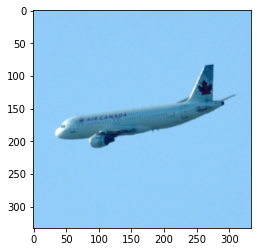

In [47]:
# Create a function to read image
def read_img(file):
    image_string = tf.io.read_file(file)  # read file
    # decode the imported file 
    image_decode = tf.image.decode_image(image_string)
    # image_decode = tf.expand_dims(image_decode, axis=0)
    return image_decode

img = read_img('image/airplane.png')  #read image
plt.imshow(img)  # display the image

In [48]:
# read image
image_string = tf.io.read_file('image/airplane.png')  
image_decode = tf.image.decode_image(image_string)

In [49]:
with summary_writer.as_default():  # summary_writer
    tf.summary.image("Airplane", [image_decode], step=0)  # wite image to log file 

In [50]:
# Open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [52]:
%tensorboard --port 9560 --logdir lab7-logs-summary-image

Reusing TensorBoard on port 9560 (pid 14056), started 0:01:08 ago. (Use '!kill 14056' to kill it.)

2. Write five images at a time to the log file and display

In [55]:
#!ls image/

In [59]:
#create a log file
summary_writer = tf.summary.create_file_writer('lab7-logs-summary-image_1')

In [60]:
img_files = ['airplane_zoom.png', 'airplane_flip.png', 'airplane_color.png', 'airplane_rot.png',
             'airplane.png']  # five images in folder "image"

imgs = [] 

for file in img_files: 
    imgs.append(read_img('image/'+file))  # read image and store it in the array

with summary_writer.as_default():  # summary_writer
    tf.summary.image("Airplane Augmentation", imgs, max_outputs=5, step=0) 

In [61]:
# Open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

In [63]:
#Open log file on TensorBoard
%tensorboard --port 9565 --logdir lab7-logs-summary-image

Reusing TensorBoard on port 9565 (pid 11768), started 0:01:42 ago. (Use '!kill 11768' to kill it.)

3. Write five images in separate steps

In [64]:
#create a log file
summary_writer = tf.summary.create_file_writer('lab7-logs-summary-image_2')

In [65]:
with summary_writer.as_default():  # summary_writer
    # writing in separate step
    for i, img in enumerate(imgs):
        tf.summary.image("Save image each step", [img], step=i)  

In [66]:
# Open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [68]:
#Open log file on TensorBoard
%tensorboard --port 9565 --logdir lab7-logs-summary-image_2

Reusing TensorBoard on port 9565 (pid 7192), started 0:02:29 ago. (Use '!kill 7192' to kill it.)

### c) tf.summary.text

“tf.summary.text” is an API of “tf.summary” module, which is responsible for writing text summary, and its results can display through the TensorBoard TEXT visualization tool.

In [69]:
#create a log file
summary_writer = tf.summary.create_file_writer('lab7-logs-summary-text')

In [70]:
# Create a text array 
texts = ["Jonh: I want to learn more about deep CNN", 
         "Cubee: Yes, it is hot topic today", 
         "Jonh: Which tool can I use to visualize the result of the network", 
         "Cubee: TensorBorad is a famous tool", 
         "Jonh: Could you please tell me more detail?", 
         "Cubee: You can visit the website: https://www.tensorflow.org/tensorboard", 
         "Jonh: Thank you!"]

with summary_writer.as_default():  # summary_writer
# Write each piece of string information to a log file in separate steps
    for i, text in enumerate(texts):
        tf.summary.text("Chat record", text, step=i)  #

In [71]:
# Open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [75]:
#Open log file on TensorBoard
%tensorboard --port 9570 --logdir lab7-logs-summary-text

Reusing TensorBoard on port 9570 (pid 13968), started 0:01:43 ago. (Use '!kill 13968' to kill it.)

### d) tf.summary.audio

“tf.summary.audio” is an API of “tf.summary” module, which is used to write an audio summary, and its result can display on the TensorBoard AUDIO visual tool. 

In [76]:
#create a log file
summary_writer = tf.summary.create_file_writer('lab7-logs-summary-audio')

In [77]:
# create a function to read audio file
def read_audio(file):
    audio_string = tf.io.read_file(file)  # reading file
    audio, fs = tf.audio.decode_wav(audio_string)
    # tf.summary.audio requires the input format to be [n(audio), m(frames), c(channels)]
    # audio data above only has [t(frames), c(channels)], so need to add a dimension
    audio = tf.expand_dims(audio, axis=0)
    return audio, fs

audio, fs = read_audio('./audio/cat.wav')  

with summary_writer.as_default():  # summary_writer
    tf.summary.audio('cat', audio, fs, step=0)  # wite in log file

In [78]:
# Open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [80]:
#Open log file on TensorBoard
%tensorboard --port 9575 --logdir lab7-logs-summary-audio

Reusing TensorBoard on port 9575 (pid 3816), started 0:07:54 ago. (Use '!kill 3816' to kill it.)

### e) tf.summary.histogram

“tf.summary.histogram” is an API of “tf.summary” module, which is used to write a histogram summary, and its result can display on the TensorBoard HISTOGRAMS and DISTRIBUTIONS visualization tools. 

In [88]:
#create a log file
summary_writer = tf.summary.create_file_writer('lab7-logs-summary-histogram')

In [89]:
data = tf.random.normal([64, 100], dtype=tf.float64)

In [90]:
#with summary_writer.as_default():
#    tf.summary.histogram('Normal distribution', data, step=0)

In [84]:
# Write 100 sets of random values to a log file
with summary_writer.as_default():
    for i, offset in enumerate(tf.range(0, 10, delta=0.1, dtype=tf.float64)):
        tf.summary.histogram('Normal distribution 2', data+offset, step=i)

In [85]:
# Open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [87]:
#Open log file on TensorBoard
%tensorboard --port 9585 --logdir lab7-logs-summary-histogram

Reusing TensorBoard on port 9580 (pid 6972), started 0:01:08 ago. (Use '!kill 6972' to kill it.)

# Experiment 1: Using tf.summary.image API to Visualize Training Results

This experiment employs the tf.summary.image API to write the confusion matrix result of a network model trained on the CIFAR-10 dataset and display this result on TensorBorad IMAGE.

### 1.	Creating helper functions 

a)	Import necessary packages: 

In [99]:
import os
import io
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from preprocessing import parse_aug_fn, parse_fn

b)	Creating plot_confusion_matrix function.

•	Confusion matrix function: use tf.math.confusion_matrix to compute the confusion matrix from expected outputs (y_true) and predictions (y_pred).

In [100]:
y_true = [2, 1, 0, 2, 2, 0, 1, 1]
y_pred = [0, 1, 0, 2, 2, 0, 2, 1]
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3).numpy()
print(cm)

[[2 0 0]
 [0 2 1]
 [1 0 2]]


•	Create a “plot_confusion_matrix” function: the numbers in the Confusion matrix represents the percentage of prediction.

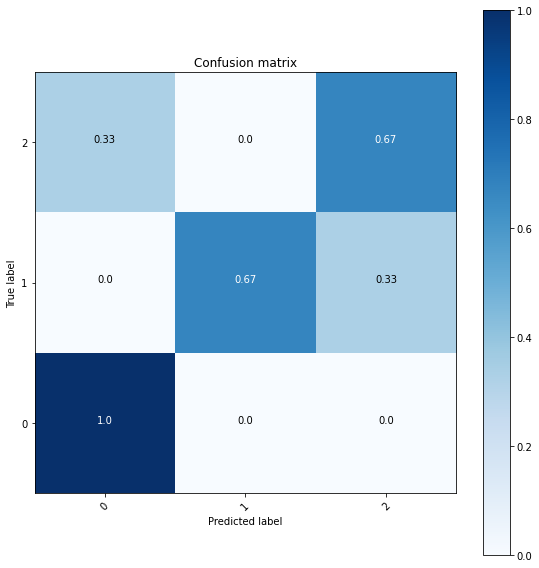

In [101]:
def plot_confusion_matrix(cm, class_names):
    """
    Confusion matrix
    
    Args:
    cm (shape = [n, n]): Confusion matrix
    class_names (shape = [n]): category names.
    """
    # normalization of confusion matrix
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Set the size of the figure (for displaying)
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    tick_index = np.arange(len(class_names))

    plt.ylim([-0.5, 2.5])
    # Y-axis displays category name
    plt.yticks(tick_index, class_names)
    # # The x axis displays the category name and rotates the category name by 45 degrees 
    plt.xticks(tick_index, class_names, rotation=45)
    # Create a color bar on the right side of the image
    plt.colorbar()

    # Enter the prediction values in each grid cell of Confusion matrix
    threshold = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # If the color of the grid cell is too dark, use white text, otherwise use black text
            color = "white" if cm[i, j] > threshold else "black"
            plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
            
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Adjust the position of the image 
    plt.tight_layout()
    return figure

img = plot_confusion_matrix(cm, [0, 1, 2])

c)	Create a “plot_to_image” function

Convert Matplotlib-style image to TensorFolow-style image for visualizing on TensorBorad.

In [102]:
def plot_to_image(figure):
    # Save Matplotlib-style image using PNG format
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)
    # convert image for using on TensorFlow
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)
    return image

In [103]:
# Example
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3).numpy()
img = plot_confusion_matrix(cm, [0, 1, 2])
img_show = plot_to_image(img)

d)	Creating custom callback

After each epoch during the training process, an image of the Confusion matrix is generated for displaying on the TensorBoard.

In [104]:
class ConfusionMatrix(tf.keras.callbacks.Callback):
    def __init__(self, log_dir, test_data, class_name):
        super(ConfusionMatrix, self).__init__()
        self.log_dir = log_dir
        self.test_data = test_data
        self.class_names = class_name
        self.num_classes = len(class_name)

    def on_train_begin(self, logs=None):
        path = os.path.join(self.log_dir, 'confusion_matrix')
        # Create TensorBoard log file
        self.writer = tf.summary.create_file_writer(path)

    def on_epoch_end(self, epoch, logs=None):
        # Calculate Confusion matrix
        total_cm = np.zeros([10, 10])
        for x, y_true in self.test_data:
            y_pred = self.model.predict(x)
            y_pred = np.argmax(y_pred, axis=1)
            y_true = np.argmax(y_true, axis=1)
            cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=self.num_classes).numpy()
            total_cm += cm
        
        # Plot confusion matrix 
        figure = plot_confusion_matrix(total_cm, class_names=self.class_names)
        # Convert Matplotlib-style image for using on TensorFlow
        cm_image = plot_to_image(figure)

        # Write the converted image 
        with self.writer.as_default():
            tf.summary.image("Confusion Matrix", cm_image, step=epoch)

### 2.	Building and training network model

a)	Loading and dividing data (Cifar-10)

•	Load CIFAR-10 dataset:

In [105]:
# Divide training data : 9 part for training and 1 part for validation.
train_split, valid_split = ['train[:90%]', 'train[90%:]']
# get the training data 
train_data, info = tfds.load("cifar10", split=train_split, with_info=True)
# get the valid data 
valid_data = tfds.load("cifar10", split=valid_split)
# get test data 
test_data = tfds.load("cifar10", split=tfds.Split.TEST)
# Get the category name of the CIFAR-10 dataset
class_name = info.features['label'].names

•	Dataset setting: 

In [106]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # Automatic adjustment mode
batch_size = 64  # Batch size
train_num = int(info.splits['train'].num_examples / 10) * 9  # Number of training data

train_data = train_data.shuffle(train_num)  # Shuffle the training data
#Training data
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# # Set batch size and turn on prefetch mode
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# Validation data
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# Test data
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode 
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

b) Build network model:

The architecture of model:

-	Input layer with shape of (32, 32, 3).

-	Five convolutional layers, followed by ReLu activation functions.

-	One max pooling layer.

-	One flatten layer for flattening the input into a one-dimensional Tensor.

-	One fully connected layer.

-	One dropout layer with a discard rate of 50%.

-	Output fully connected layer with 10 neurons.

In [107]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(256, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
# create model
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          7379

c)	Set Callback function

In [12]:
# Save training log
logs_dirs = 'lab7-logs-images'
model_cbk = keras.callbacks.TensorBoard(logs_dirs)
# Save Confusion matrix image
save_cm = ConfusionMatrix(logs_dirs, test_data, class_name)

d)	Set the optimizer, loss function, and metric function for training

In [13]:
model_1.compile(keras.optimizers.Adam(), 
                loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                metrics=[keras.metrics.CategoricalAccuracy()])

e)	Training network model

In [14]:
model_1.fit(train_data,
            epochs=100, 
            validation_data=valid_data,
            callbacks=[model_cbk, save_cm])

Epoch 1/100
      1/Unknown - 4s 4s/step - loss: 2.3080 - categorical_accuracy: 0.1094

W0629 20:55:55.693831 139815137187648 callbacks.py:241] Method (on_train_batch_end) is slow compared to the batch update (0.128922). Check your callbacks.


704/704 [==============================] - 16s 22ms/step - loss: 2.0773 - categorical_accuracy: 0.2196 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 13s 18ms/step - loss: 1.8722 - categorical_accuracy: 0.3069 - val_loss: 1.5641 - val_categorical_accuracy: 0.4276
Epoch 3/100
704/704 [==============================] - 13s 19ms/step - loss: 1.7459 - categorical_accuracy: 0.3602 - val_loss: 1.4246 - val_categorical_accuracy: 0.4756
Epoch 4/100
704/704 [==============================] - 13s 19ms/step - loss: 1.6568 - categorical_accuracy: 0.3955 - val_loss: 1.3370 - val_categorical_accuracy: 0.5268
Epoch 5/100
704/704 [==============================] - 13s 18ms/step - loss: 1.5911 - categorical_accuracy: 0.4272 - val_loss: 1.2556 - val_categorical_accuracy: 0.5528
Epoch 6/100
704/704 [==============================] - 13s 18ms/step - loss: 1.5312 - categorical_accuracy: 0.4474 - val_loss: 1.1968 - val_categorical_accurac

704/704 [==============================] - 13s 18ms/step - loss: 0.7890 - categorical_accuracy: 0.7370 - val_loss: 0.6618 - val_categorical_accuracy: 0.7960
Epoch 98/100
704/704 [==============================] - 13s 19ms/step - loss: 0.7761 - categorical_accuracy: 0.7423 - val_loss: 0.6465 - val_categorical_accuracy: 0.7918
Epoch 99/100
704/704 [==============================] - 13s 18ms/step - loss: 0.7992 - categorical_accuracy: 0.7354 - val_loss: 0.6544 - val_categorical_accuracy: 0.7866
Epoch 100/100
704/704 [==============================] - 13s 18ms/step - loss: 0.7820 - categorical_accuracy: 0.7400 - val_loss: 0.6489 - val_categorical_accuracy: 0.7966


# Experiment 2: Hyperparameter Tuning with TensorBoard HParams

The last section of this chapter introduces a hyperparameter tuning technique with the HParams Dashboard provided by TensorFlow, which can help to identify the most suitable hyperparameters for specific problem. This technique is explained directly through a program example that builds 36 network models with different combinations of hyperparameters and they are trained on CIFAR-10 dataset for analysis and comparison of obtained results. The hyperparameters used for building neural network models are listed as below:

•	Image augmentation (IA): Yes or No.

•	Batch Normalization (BN): Yes or No.

•	Learning rate (LR): 0.001, 0.01, or 0.03.

•	Weight initialization method: Random Normal, Glorot Normal, or He Normal.


### 1.	Setting hyperparameters

a)	Import packages

In [116]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from preprocessing import parse_aug_fn, parse_fn

b)	Import TensorBoard HParams plugin

In [117]:
from tensorboard.plugins.hparams import api as hp

c)	Defining Hyperparameters

The hyperparameters used for building network models are listed as below:

-	Imgae Augmentation: Yes or No.

-	Batch Normalization (BN): Yes or No.

-	Learning rate (LR): 0.001, 0.01, 0.03.

-	Weight initialization method: Random Normal, Glorot Normal, He Normal.


In [118]:
hparam_ia = hp.HParam('Imgae_Augmentation', hp.Discrete([False, True]))
hparam_bn = hp.HParam('Batch_Normalization', hp.Discrete([False, True]))
hparam_init = hp.HParam('Weight_Initialization', hp.Discrete(['RandomNormal_0.01std', 'glorot_normal', 'he_normal']))
hparam_lr = hp.HParam('Learning_Rate', hp.Discrete([0.001, 0.01, 0.03]))

d)	Writing to a log file 

In [119]:
metric = 'Accuracy'
log_dirs = "lab7-logs-hparams/hparam_tuning"
with tf.summary.create_file_writer(log_dirs).as_default():
    hp.hparams_config(
        hparams=[hparam_ia, hparam_bn, hparam_init, hparam_lr],
        metrics=[hp.Metric(metric, display_name='Accuracy')],
    )

### 2.	Building and training network models

a) Prepare training data: using image augmentation and without image augmentation

In [120]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # Automatic adjustment mode
batch_size = 64  # batch size
# 9 for training data and 1 for validation data
train_split, valid_split = ['train[:90%]', 'train[90%:]']

# -----Set the training data without image augmentation-----
train_data_noaug, info = tfds.load("cifar10", split=train_split, with_info=True)
train_data_aug = tfds.load("cifar10", split=train_split)
valid_data = tfds.load("cifar10", split=valid_split)
train_num = int(info.splits['train'].num_examples / 5) * 4  # 

train_data_noaug = train_data_noaug.shuffle(train_num)  
train_data_noaug = train_data_noaug.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode 
train_data_noaug = train_data_noaug.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# -----training data with image augmentation--------
train_data_aug = train_data_aug.shuffle(train_num)  #  Shuffle data
train_data_aug = train_data_aug.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode 
train_data_aug = train_data_aug.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

#Validation data
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode 
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

b)	Creating custom hyperparameter callback function

The custom hyperparameter callback function is created to write the hyperparameters and metric values for displaying on TensorBoard.

In [122]:
class HyperparameterCallback(tf.keras.callbacks.Callback):
    # # Call when the category is created
    def __init__(self, log_dir, hparams):
        super(HyperparameterCallback, self).__init__()
        self.log_dir = log_dir
        self.hparams = hparams
        self.best_accuracy = 0
        self.writer = None
        
    # call before starting training to create a log file
    def on_train_begin(self, logs=None):
        self.writer = tf.summary.create_file_writer(self.log_dir)

    # after each Epoch, if the model progresses, #its weights is updated.
    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('val_categorical_accuracy')
        if current_accuracy > self.best_accuracy:
            self.best_accuracy = current_accuracy
            
    # # after each Epoch, if the model progresses, #its weights is updated.
    def on_train_end(self, logs=None):
        with self.writer.as_default():
            hp.hparams(self.hparams)  # record the values used in this trial
            tf.summary.scalar(metric, self.best_accuracy, step=0)

c)	Creating a function for building and training the network models. 

The network layers used in the models are listed below:   
- keras.Input: Input layer with the size of 32x32x3.

- layers.Conv2D): The convolutional layer uses a 3×3 kernel (hyperparameters: normal distribution with standard deviation of 0.01, Glorot initialization, or He initialization).

- layers.BatchNormalization: BatchNormalization layer with preset parameters. (hyperparameters: use or not use).

- layers.ReLU: ReLU activation function layer.

- layers.MaxPool2D: Pooling layer, for downsampling the feature map.

- layers.Flatten: Flatten layer, for flattening the input into a one-dimensional Tensor.

- layers.Dropout: Dropout layer, which randomly sets input units to 0 with a frequency of 50 at each step during training time.

- layers.Dense: Fully connected layer; if this layer is used as the hidden layer of the network, ReLU activation function will be adopted. ReLU activation function will be replaced with Softmax activation function if this layer is used as the output layer of the network.


In [123]:
def train_test_model(logs_dir, hparams):
    """
    logs_dir: the location of the currently executed task log file
    hparams: Incoming hyperparameter

    """
    # # Weight initialization: using normal distribution (std 0.01), Glorot, or He method
    if hparams[hparam_init] == "glorot_normal":
        init = keras.initializers.glorot_normal()
    elif hparams[hparam_init] == "he_normal":
        init = keras.initializers.he_normal()
    else:
        init = keras.initializers.RandomNormal(0, 0.01)

    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), kernel_initializer=init)(inputs)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(256, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(128, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(64, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    # Create a network model
    model = keras.Model(inputs, outputs, name='model')

    # Save training log
    model_tb = keras.callbacks.TensorBoard(log_dir=logs_dir, write_graph=False)

    # Save the best model’s weight 
    model_mckp = keras.callbacks.ModelCheckpoint(logs_dir +'/best-model.hdf5', 
                                                 monitor='val_categorical_accuracy', 
                                                 save_best_only=True, 
                                                 mode='max')
      
    # Set the conditions for early stopping 
    model_els = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy' , 
                                              min_delta=0, 
                                              patience=30, 
                                              mode='max')
    # Custom callback to write the hyperparameters and metric (accuracy) of the #training model 

    model_hparam = HyperparameterCallback(logs_dir + 'hparam_tuning', hparams)


    # Set the optimizer, loss function, and metric function
    # The learning rate is: 0.001, 0.01 or 0.03

    model.compile(keras.optimizers.Adam(hparams[hparam_lr]), 
                  loss=keras.losses.CategoricalCrossentropy(), 
                  metrics=[keras.metrics.CategoricalAccuracy()])
    
    # Hyperparameters: use or do not use “image augmentation” to train the network
    if hparams[hparam_ia]:
        history = model.fit(train_data_aug,
                            epochs=2, 
                            validation_data=valid_data,
                            callbacks=[model_tb, model_mckp, model_els, model_hparam])
    else:
        history = model.fit(train_data_noaug,
                            epochs=2, 
                            validation_data=valid_data,
                            callbacks=[model_tb, model_mckp, model_els, model_hparam])

d)	Training 36 network models with different combinations of hyperparameters：

In [ ]:
session_id = 1  # the id of Training task
for ia in hparam_ia.domain.values:
    for bn in hparam_bn.domain.values:
        for init in hparam_init.domain.values:
            for lr in hparam_lr.domain.values:
                # # Display the current training task id
                print('--- Running training session {}'.format(session_id))
                # Set the hyperparameters for this training
                hparams = {hparam_ia: ia, hparam_bn: bn, hparam_init: init, hparam_lr: lr}
                # the place to store log files
                logs_dir = os.path.join("lab7-logs-hparams", "run-{}".format(session_id))
                # Create, compile and train network models
                train_test_model(logs_dir, hparams)
                session_id += 1  # id+1

--- Running training session 1
Epoch 1/2
  1/704 [..............................] - ETA: 0s - loss: 2.3026 - categorical_accuracy: 0.0938WARNING:tensorflow:From C:\Users\hieu\tf2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


704/704 [==============================] - 203s 288ms/step - loss: 2.3027 - categorical_accuracy: 0.0997 - val_loss: 2.3027 - val_categorical_accuracy: 0.0948
Epoch 2/2
704/704 [==============================] - 198s 282ms/step - loss: 2.3027 - categorical_accuracy: 0.0997 - val_loss: 2.3027 - val_categorical_accuracy: 0.0956
--- Running training session 2
Epoch 1/2
  2/704 [..............................] - ETA: 5:43 - loss: 2.3725 - categorical_accuracy: 0.0938WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2609s vs `on_train_batch_end` time: 0.7099s). Check your callbacks.


704/704 [==============================] - 198s 282ms/step - loss: 2.3047 - categorical_accuracy: 0.0976 - val_loss: 2.3033 - val_categorical_accuracy: 0.0990
Epoch 2/2
704/704 [==============================] - 198s 281ms/step - loss: 2.3037 - categorical_accuracy: 0.0987 - val_loss: 2.3039 - val_categorical_accuracy: 0.1094
--- Running training session 3
Epoch 1/2
  2/704 [..............................] - ETA: 4:34 - loss: 332.1397 - categorical_accuracy: 0.0703WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2662s vs `on_train_batch_end` time: 0.5060s). Check your callbacks.


704/704 [==============================] - 195s 276ms/step - loss: 3.3663 - categorical_accuracy: 0.1000 - val_loss: 2.3056 - val_categorical_accuracy: 0.0940
Epoch 2/2
704/704 [==============================] - 196s 278ms/step - loss: 2.3052 - categorical_accuracy: 0.0980 - val_loss: 2.3052 - val_categorical_accuracy: 0.1006
--- Running training session 4
Epoch 1/2
  2/704 [..............................] - ETA: 5:35 - loss: 2.3692 - categorical_accuracy: 0.1250WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2660s vs `on_train_batch_end` time: 0.6798s). Check your callbacks.


704/704 [==============================] - 195s 277ms/step - loss: 1.8616 - categorical_accuracy: 0.3008 - val_loss: 1.5471 - val_categorical_accuracy: 0.4424
Epoch 2/2
704/704 [==============================] - 200s 284ms/step - loss: 1.4939 - categorical_accuracy: 0.4595 - val_loss: 1.2349 - val_categorical_accuracy: 0.5510
--- Running training session 5
Epoch 1/2
  2/704 [..............................] - ETA: 4:47 - loss: 73.8365 - categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2868s vs `on_train_batch_end` time: 0.5227s). Check your callbacks.


704/704 [==============================] - 207s 294ms/step - loss: 2.5244 - categorical_accuracy: 0.0976 - val_loss: 2.3033 - val_categorical_accuracy: 0.0984
Epoch 2/2
704/704 [==============================] - 194s 276ms/step - loss: 2.3035 - categorical_accuracy: 0.1005 - val_loss: 2.3035 - val_categorical_accuracy: 0.0948
--- Running training session 6
Epoch 1/2
  2/704 [..............................] - ETA: 4:39 - loss: 27654.3379 - categorical_accuracy: 0.1094WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2688s vs `on_train_batch_end` time: 0.5189s). Check your callbacks.


704/704 [==============================] - 199s 282ms/step - loss: 95.7621 - categorical_accuracy: 0.0986 - val_loss: 2.3072 - val_categorical_accuracy: 0.0948
Epoch 2/2
704/704 [==============================] - 194s 275ms/step - loss: 2.3047 - categorical_accuracy: 0.1016 - val_loss: 2.3028 - val_categorical_accuracy: 0.1000
--- Running training session 7
Epoch 1/2
  2/704 [..............................] - ETA: 6:01 - loss: 2.6748 - categorical_accuracy: 0.1250WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2648s vs `on_train_batch_end` time: 0.7567s). Check your callbacks.


704/704 [==============================] - 195s 277ms/step - loss: 1.8469 - categorical_accuracy: 0.3061 - val_loss: 1.4388 - val_categorical_accuracy: 0.4626
Epoch 2/2
704/704 [==============================] - 197s 280ms/step - loss: 1.4467 - categorical_accuracy: 0.4757 - val_loss: 1.1572 - val_categorical_accuracy: 0.5816
--- Running training session 8
Epoch 1/2
  2/704 [..............................] - ETA: 4:31 - loss: 156.1286 - categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2629s vs `on_train_batch_end` time: 0.5008s). Check your callbacks.


704/704 [==============================] - 197s 280ms/step - loss: 2.7525 - categorical_accuracy: 0.0988 - val_loss: 2.3030 - val_categorical_accuracy: 0.0984
Epoch 2/2
704/704 [==============================] - 198s 281ms/step - loss: 2.3035 - categorical_accuracy: 0.1017 - val_loss: 2.3051 - val_categorical_accuracy: 0.0956
--- Running training session 9
Epoch 1/2
  2/704 [..............................] - ETA: 4:38 - loss: 9425.8975 - categorical_accuracy: 0.1406WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2838s vs `on_train_batch_end` time: 0.5007s). Check your callbacks.


704/704 [==============================] - 196s 279ms/step - loss: 31.3279 - categorical_accuracy: 0.0980 - val_loss: 2.3049 - val_categorical_accuracy: 0.1000
Epoch 2/2
704/704 [==============================] - 200s 285ms/step - loss: 2.3047 - categorical_accuracy: 0.1003 - val_loss: 2.3045 - val_categorical_accuracy: 0.0984
--- Running training session 10
Epoch 1/2
  2/704 [..............................] - ETA: 7:50 - loss: 3.0594 - categorical_accuracy: 0.1172WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.4088s vs `on_train_batch_end` time: 0.9222s). Check your callbacks.


704/704 [==============================] - 298s 423ms/step - loss: 1.6044 - categorical_accuracy: 0.4311 - val_loss: 1.8077 - val_categorical_accuracy: 0.4034
Epoch 2/2
704/704 [==============================] - 301s 427ms/step - loss: 1.1734 - categorical_accuracy: 0.5932 - val_loss: 1.6607 - val_categorical_accuracy: 0.4550
--- Running training session 11
Epoch 1/2
  2/704 [..............................] - ETA: 10:02 - loss: 3.1857 - categorical_accuracy: 0.0938WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.4008s vs `on_train_batch_end` time: 1.3075s). Check your callbacks.


704/704 [==============================] - 305s 434ms/step - loss: 1.6473 - categorical_accuracy: 0.3991 - val_loss: 1.3656 - val_categorical_accuracy: 0.5156
Epoch 2/2
704/704 [==============================] - 325s 461ms/step - loss: 1.2859 - categorical_accuracy: 0.5430 - val_loss: 2.4677 - val_categorical_accuracy: 0.3744
--- Running training session 12
Epoch 1/2
  2/704 [..............................] - ETA: 8:50 - loss: 3.0412 - categorical_accuracy: 0.1484WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.4158s vs `on_train_batch_end` time: 1.0874s). Check your callbacks.


704/704 [==============================] - 314s 446ms/step - loss: 1.7237 - categorical_accuracy: 0.3626 - val_loss: 2.1011 - val_categorical_accuracy: 0.3394
Epoch 2/2
704/704 [==============================] - 312s 443ms/step - loss: 1.4070 - categorical_accuracy: 0.4909 - val_loss: 2.6466 - val_categorical_accuracy: 0.2766
--- Running training session 13
Epoch 1/2
  2/704 [..............................] - ETA: 10:19 - loss: 3.0878 - categorical_accuracy: 0.1016WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.4308s vs `on_train_batch_end` time: 1.3224s). Check your callbacks.


704/704 [==============================] - 318s 452ms/step - loss: 1.5165 - categorical_accuracy: 0.4685 - val_loss: 1.1394 - val_categorical_accuracy: 0.5914
Epoch 2/2
214/704 [========>.....................] - ETA: 3:36 - loss: 1.1515 - categorical_accuracy: 0.6005